In [1]:
#Imports essential libraries for data manipulation, numerical operations, visualization, and date/time handling.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
# Reads the 'netflix_users.csv' file into a pandas dataframe named 'Netflix_df'.
Netflix_df = pd.read_csv('netflix_users.csv')

In [3]:
# displays the entire Netflix_df dataframe
Netflix_df

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14
...,...,...,...,...,...,...,...,...
24995,24996,David Miller,18,Australia,Premium,183.88,Horror,2025-01-18
24996,24997,Jane Miller,17,USA,Premium,112.37,Drama,2024-06-29
24997,24998,Sarah Miller,14,USA,Premium,351.80,Action,2024-10-16
24998,24999,Michael Williams,71,USA,Basic,655.89,Action,2024-08-27


In [4]:
#function provide a quick summary of a dataframe
def check_df(dataframe):
    print("--- Nulls ---\n")
    print(dataframe.isna().sum())
    print("\n\n--- Shape ---\n")
    print(dataframe.shape)
    print("\n\n--- Columns ---\n")
    print(dataframe.columns)
    print("\n\n--- Types ---")
    print(dataframe.dtypes)

#Summary of the dataframe with the function
check_df(Netflix_df)

--- Nulls ---

User_ID              0
Name                 0
Age                  0
Country              0
Subscription_Type    0
Watch_Time_Hours     0
Favorite_Genre       0
Last_Login           0
dtype: int64


--- Shape ---

(25000, 8)


--- Columns ---

Index(['User_ID', 'Name', 'Age', 'Country', 'Subscription_Type',
       'Watch_Time_Hours', 'Favorite_Genre', 'Last_Login'],
      dtype='object')


--- Types ---
User_ID                int64
Name                  object
Age                    int64
Country               object
Subscription_Type     object
Watch_Time_Hours     float64
Favorite_Genre        object
Last_Login            object
dtype: object


In [5]:
#Cleaning / converts the 'Last_Login' column in the Netflix_df dataframe to datetime objects
Netflix_df['Last_Login'] = pd.to_datetime(Netflix_df['Last_Login'])

C:\Users\papac\AppData\Local\Temp\ipykernel_18500\3142498139.py:6: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x=df_avg_watchtime_per_country.index, y=df_avg_watchtime_per_country.values, hue=df_avg_watchtime_per_country.index , palette=custom_palette)


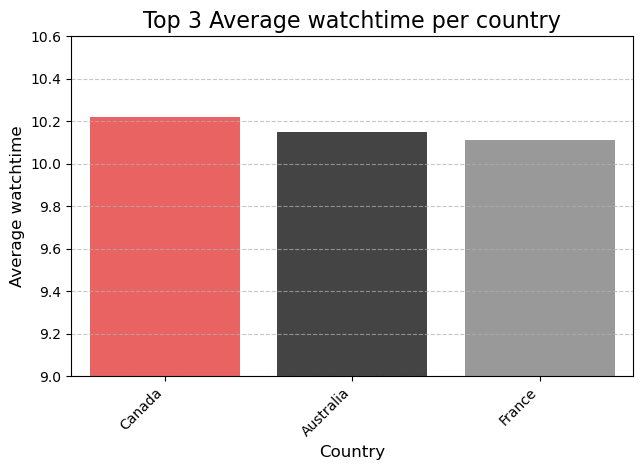

In [19]:
#groups the Netflix_df dataframe by 'Country', calculates the mean 'Watch_Time_Hours' for each country
df_avg_watchtime_per_country = Netflix_df.groupby(['Country'])['Watch_Time_Hours'].mean().sort_values(ascending=False)

#normalizes the average watch time for each country and then selects only the top 3 countries
df_avg_watchtime_per_country = ((df_avg_watchtime_per_country/df_avg_watchtime_per_country.sum())*100).round(2).head(3)


#Plot for Top 3 Average watchtime per country
custom_palette = ['#FF4D4D', '#444444', '#999999', '#CCCCCC']
sns.barplot(x=df_avg_watchtime_per_country.index, y=df_avg_watchtime_per_country.values, hue=df_avg_watchtime_per_country.index , palette=custom_palette)
plt.title('Top 3 Average watchtime per country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average watchtime', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.ylim(9, 10.6) 
plt.show()

C:\Users\papac\AppData\Local\Temp\ipykernel_18500\2965914263.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  subscription_counts


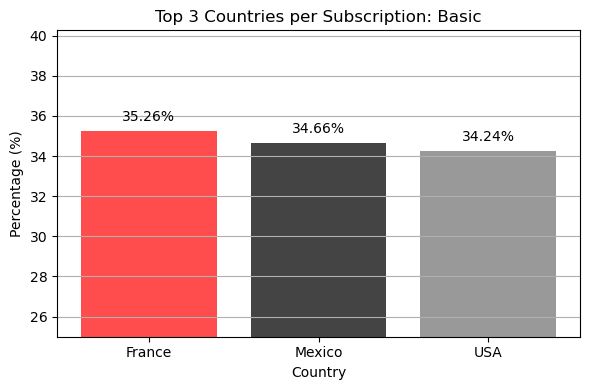

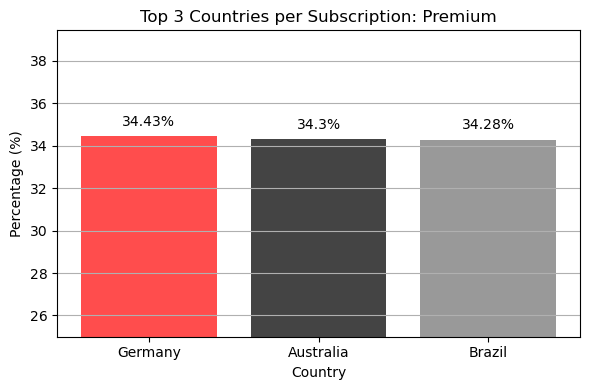

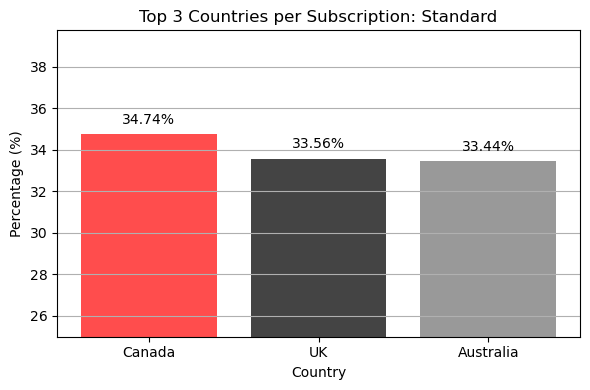

In [17]:
# groups the Netflix_df by 'Country' and 'Subscription_Type'
subscription_counts = Netflix_df.groupby(['Country', 'Subscription_Type']).size()

# calculates the percentage of each subscription type within each country
subscription_percentages = (
    subscription_counts
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack()
    .fillna(0)
    .round(2)
)

top3_per_subscription = {} # initializes an empty dictionary to store the top 3 countries for each subscription type.
# iterates through each unique subscription type (which are now columns in subscription_percentages).
for subscription in subscription_percentages.columns:
    top3 = subscription_percentages[subscription].sort_values(ascending=False).head(3) # for the current subscription type, selects the top 3 countries with the highest percentage.
    top3_per_subscription[subscription] = top3 # stores these top 3 countries and their percentages in the 'top3_per_subscription' dictionary.

for subscription, data in top3_per_subscription.items(): # iterates through the 'top3_per_subscription' dictionary, where each item is a subscription type and its corresponding top 3 countries data.
    plt.figure(figsize=(6, 4))
    plt.bar(data.index, data.values, color=custom_palette)
    plt.title(f'Top 3 Countries per Subscription: {subscription}')
    plt.ylabel('Percentage (%)')
    plt.xlabel('Country')
    plt.ylim(25, data.max() + 5)
    for i, v in enumerate(data.values):
        plt.text(i, v + 0.5, f'{v}%', ha='center')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

C:\Users\papac\AppData\Local\Temp\ipykernel_18500\4145815481.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  genre_subscription_counts


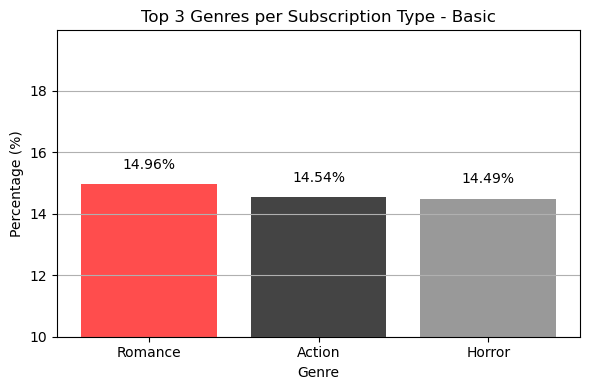

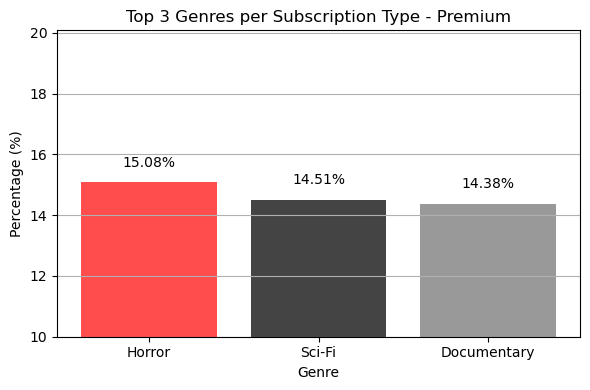

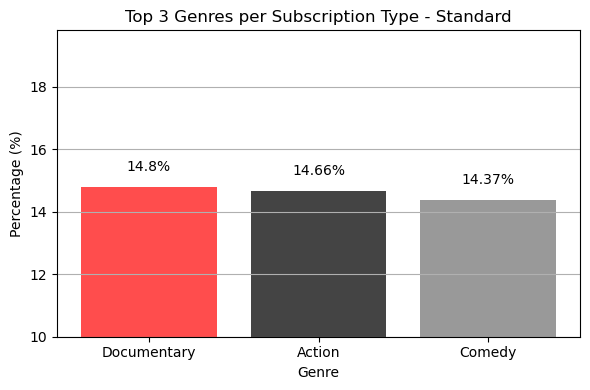

In [20]:
# groups the Netflix_df by 'Subscription_Type' and 'Favorite_Genre' and then counts the number of occurrences for each combination.
genre_subscription_counts = Netflix_df.groupby(['Subscription_Type', 'Favorite_Genre']).size()

# calculates the percentage of each 'Favorite_Genre' within each 'Subscription_Type':
genre_subscription_percentages = (
    genre_subscription_counts
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack()
    .fillna(0)
    .round(2)
)

top3_genres_per_subscription = {} # initializes an empty dictionary to store the top 3 genres for each subscription type.

for subscription in genre_subscription_percentages.index: # iterates through each unique subscription type (which are now the index of genre_subscription_percentages).
    top3 = genre_subscription_percentages.loc[subscription].sort_values(ascending=False).head(3)
    # for the current subscription type, it selects its row from 'genre_subscription_percentages',
    # sorts the genres by percentage in descending order, and then selects the top 3.
    top3_genres_per_subscription[subscription] = top3 # stores these top 3 genres and their percentages in the 'top3_genres_per_subscription' dictionary.

for subscription, data in top3_genres_per_subscription.items(): # iterates through the 'top3_genres_per_subscription' dictionary.
    plt.figure(figsize=(6, 4))
    plt.bar(data.index, data.values, color=custom_palette)
    plt.title(f'Top 3 Genres per Subscription Type - {subscription}')
    plt.ylabel('Percentage (%)')
    plt.xlabel('Genre')
    plt.ylim(10, data.max() + 5)
    for i, v in enumerate(data.values):
        plt.text(i, v + 0.5, f'{v}%', ha='center')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

In [9]:
def categorize_generation(age): # defines a function named 'categorize_generation' that takes one argument: 'age'.
    # This function is designed to assign an age group (generation) based on the provided age.
    if age <= 25: # checks if the age is less than or equal to 25.
        return "Gen Z" # if true, returns the string "Gen Z".
    elif 26 <= age <= 40: # otherwise, checks if the age is between 26 and 40 (inclusive).
        return "Millennials" # if true, returns the string "Millennials".
    elif 41 <= age <= 56: # otherwise, checks if the age is between 41 and 56 (inclusive).
        return "Gen X" # if true, returns the string "Gen X".
    elif 57 <= age: # otherwise, checks if the age is 57 or greater.
        return "Baby Boomers" # if true, returns the string "Baby Boomers".

Netflix_df['Age Group'] = Netflix_df['Age'].apply(categorize_generation)
# creates a new column named 'Age Group' in the Netflix_df dataframe.
# it applies the 'categorize_generation' function to each value in the 'Age' column,
# effectively categorizing each user's age into a generation and storing the result in the new column.

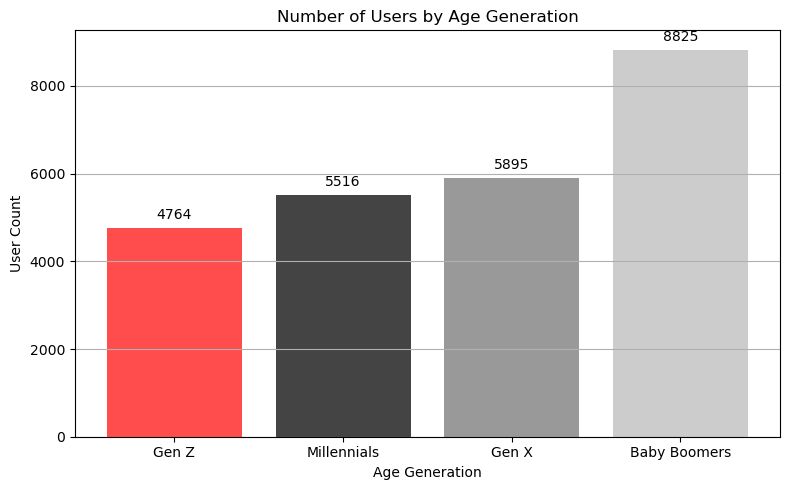

In [10]:
# calculates the frequency (count) of each unique value in the 'Age Group' column of Netflix_df.
generation_counts = Netflix_df['Age Group'].value_counts().reindex(['Gen Z', 'Millennials', 'Gen X', 'Baby Boomers'])


plt.figure(figsize=(8, 5))
plt.bar(generation_counts.index, generation_counts.values, color=custom_palette)
plt.title("Number of Users by Age Generation")
plt.xlabel("Age Generation")
plt.ylabel("User Count")
for i, value in enumerate(generation_counts.values):
    plt.text(i, value + 200, str(value), ha='center')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

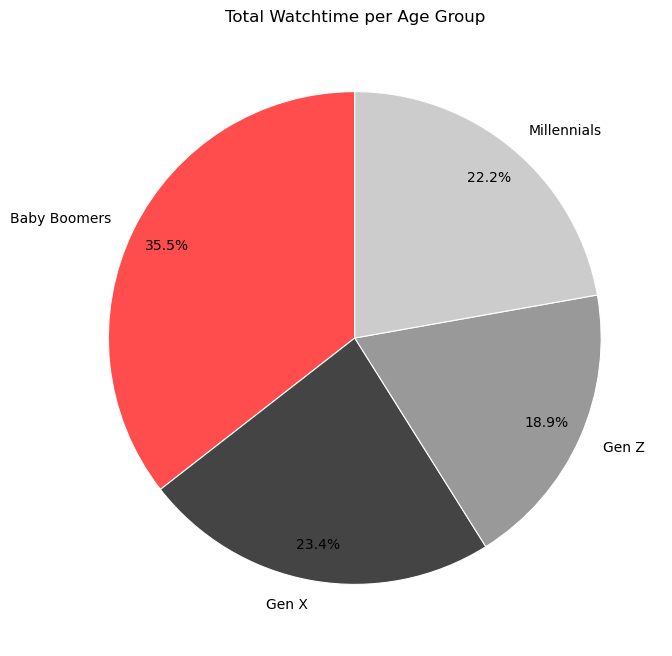

In [11]:
# groups the Netflix_df dataframe by the 'Age Group' column.
# for each age group, it calculates the sum of 'Watch_Time_Hours'.
# this results in a Series where the index is 'Age Group' and values are the total watch time for each group.
df_age_grp_views = Netflix_df.groupby(['Age Group'])['Watch_Time_Hours'].sum()

plt.figure(figsize=(10, 8))
plt.pie(
    df_age_grp_views,
    labels=df_age_grp_views.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.8},
    colors=['#FF4D4D', '#444444', '#999999', '#CCCCCC']
)
plt.title('Total Watchtime per Age Group')
plt.show()

C:\Users\papac\AppData\Local\Temp\ipykernel_18500\236371141.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  Netflix_df.groupby(['Age Group', 'Subscription_Type'])


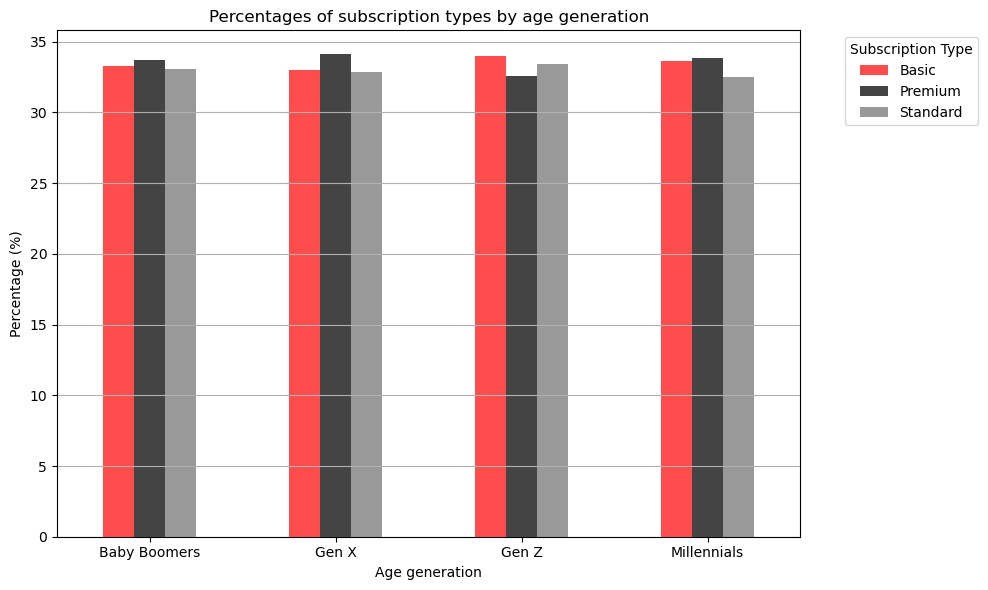

In [21]:
# `generation_subscription_pct` is a DataFrame showing the percentage of each subscription type for each age generation.
generation_subscription_pct = (
    Netflix_df.groupby(['Age Group', 'Subscription_Type'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack()
    .fillna(0)
    .round(2)
)

ax = generation_subscription_pct.plot(
    kind='bar',
    figsize=(10, 6),
    color=custom_palette 
)
ax.set_title('Percentages of subscription types by age generation')
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Age generation')
ax.legend(title='Subscription Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

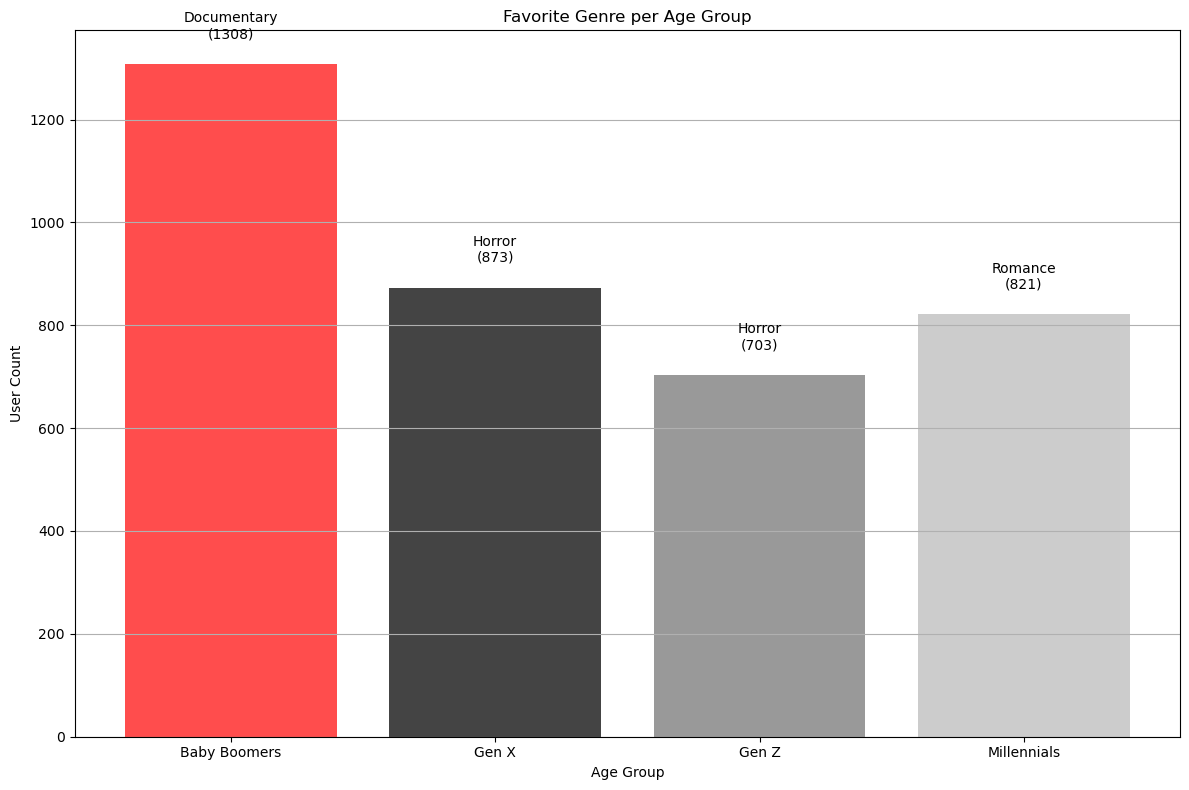

In [13]:
# groups the Netflix_df by 'Age Group' and then finds the most frequent 'Favorite_Genre' within each age group.
# `.agg(lambda x: x.mode().iloc[0])` calculates the mode (most frequent value) for 'Favorite_Genre' in each group.
# `.iloc[0]` handles cases where there might be multiple modes, selecting the first one.
# this results in a series where the index is 'Age Group' and values are their respective most favorite genre.
favorite_genre_per_generation = (
    Netflix_df.groupby('Age Group')['Favorite_Genre']
    .agg(lambda x: x.mode().iloc[0])
)

# creates a dictionary named 'top_genre_counts'.
# it iterates through the 'favorite_genre_per_generation' series (which contains the top genre for each generation).
# for each age group ('gen') and its corresponding favorite genre ('genre'),
# it retrieves the actual count of users for that specific 'favorite genre' from the 'genre_counts' series.
# this dictionary stores the favorite genre's user count for each age group.
genre_counts = Netflix_df.groupby(['Age Group', 'Favorite_Genre']).size()
top_genre_counts = {
    gen: genre_counts[gen][genre]
    for gen, genre in favorite_genre_per_generation.items()
}

plt.figure(figsize=(12, 8))
plt.bar(top_genre_counts.keys(), top_genre_counts.values(), color=custom_palette)
plt.title("Favorite Genre per Age Group")
plt.ylabel("User Count")
plt.xlabel("Age Group")

for i, (gen, count) in enumerate(top_genre_counts.items()):
    genre = favorite_genre_per_generation[gen]
    plt.text(i, count + 50, f"{genre}\n({count})", ha='center')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

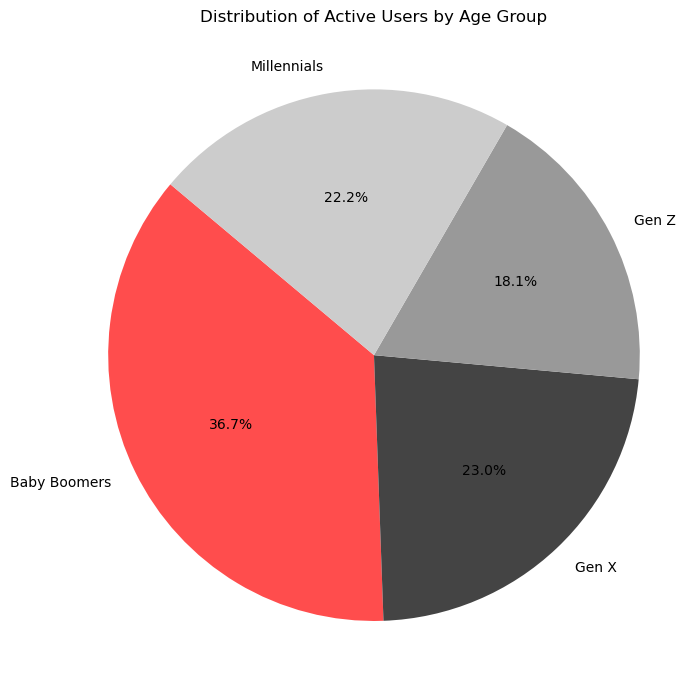

In [14]:
# calculates the number of days since each user's last login relative to the most recent login in the dataset.
Netflix_df['Days Log in'] = (Netflix_df['Last_Login'].max() - Netflix_df['Last_Login']).dt.days

# creates a new column named 'Active Customers'.
# it applies a lambda function to each value in the 'Days Log in' column:
# - if a user's 'Days Log in' is less than 60, they are classified as 'Active'.
# - otherwise, they are classified as 'Inactive'.
Netflix_df['Active Customers'] = Netflix_df['Days Log in'].apply(lambda x: 'Active' if x<60 else 'Inactive')

#filters the Netflix_df to include only 'Active' customers.
df_status_per_age_group = Netflix_df[Netflix_df['Active Customers']== 'Active'].groupby(['Age Group'])['Name'].count()

plt.figure(figsize=(7, 7))
plt.pie(
    df_status_per_age_group,
    labels=df_status_per_age_group.index,
    autopct='%1.1f%%', # automatically calculates the percentage for each slice based on its value relative to the total sum of all values
    startangle=140,
    colors=custom_palette
)
plt.title('Distribution of Active Users by Age Group')
plt.axis('equal') 
plt.tight_layout()
plt.show()